* In this section we focus on  **classification** problems where we put aside **how much** questions and instead focus on **which category** questions.
* For instance:
  1. Is this an image of a dog or a cat?
  2. Is this email spamor not spam?
  

## 1.1 Classification

* Let's start with a simple classification problem.
* Here, each input consists of a 2x2 grayscale image.
* We can represent each pixel value with a single scalar, giving us four features $x_1,x_2,x_3,x_4$.
* Let's assume that each image belongs to one among the following categories "cat","chicken" and "dog".
* Next, we choose how to represent the labels.
* An ideal way of choosing labels is perhaps choosing $y \in \{1, 2, 3\}$, where the integers represent ${dog,cat,chicken}$.
* This is a greate way od **storing** such information on a computer.
* In general classification problems do not come with natural ordering among the classes.
* There's fortunately a simple way to represent categorical data and that is the **one-hot encoding**.
* A one-hot encoding is a vector with as many components as we have categories.
* The component correspoding to a particular instance's category is set to 1 and all others are set to 0.
* In our case the labels y of our various categories will be as follows:
$y\in {(1,0,0),(0,1,0),(0,0,1)}
$

## 1.2 Linear Model

* In order to estimate the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class.
* Since we have 4 features and 3 possibe output categories, we need 12 scalars to represent the weights and 3 scalars to represent the biases.
* This yields:
\begin{align*}
o_1 &= x_1w_{11} + x_2w_{12} + x_3w_{13} + x_4w_{14} + b_1 \\
o_2 &= x_1w_{21} + x_2w_{22} + x_3w_{23} + x_4w_{24} + b_2 \\
o_3 &= x_1w_{31} + x_2w_{32} + x_3w_{33} + x_4w_{34} + b_3
\end{align*}

* The corresponding neural network diagram is show below.
* And since the calculation of each output $0_1,0_2,0_3$ depends on every input $x_1,x_2,x_3,x_4$, the output layer can also be described as a $fully connected layer$.

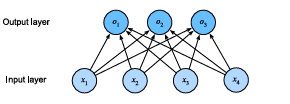

In [2]:
from IPython.display import Image
Image('single-layer-net.png')

## 1.3 Softmax

* While we can treat classification labels as targets for a linear regression, it creates hard and logically inconsistent model because raw output values $(o_i)$ do not behave like probabilities.
* This is because:
  1. There's no sum-to-one constrain meaning the outputs do not add up to 100%.
  2. There are out of bound values. Here outputs can be negative or greater than 1. For example might predict a 120% probability of a mansion being bought, which speaking statistically is nonsensical.
  3. There's sensitivity- the unbounded values make the model highly sensitive to outliers.

* To fix these issues, we need a mechanism to `squish` raw scores (logits) into a valid probability distribution.
* This mechanism is called `Softmax`.
* Here we do the following:
 1. Exponentiation(non-negativity)- here we take the exponential of each output i.e $e^{o_i}$. Since $e^{x}$ is always positive, this ensures no probability is negative.
 2. Normalization- here we divide each exponetiated value by the sum of all exponentiated values. This ensures the final outputs sum exactly to 1.
 $\hat{y}_i = \text{softmax}(o)_i = \frac{\exp(o_i)}{\sum_{j} \exp(o_j)}$

 * Here the largest coordinate of $o$ corresponds to most likely class according to $y^$.
 * Moreover, because the softmax operation preserves the ordering among its arguments, we do not need to compute the softmax to determine which class has been assigned the highest probability.
 * Thus,
 $\hat{y}_j = \operatorname*{argmax}_j o_j$

* We use argmax because while softmax gives you the probabilities for all classes, argmax is used during **inference(prediction)** to pick the single class index with the highest score.
